In [82]:
# Download dataset
from torchvision.datasets import MNIST

In [83]:
np_train_dataset = MNIST('./mnist_train_np/', train=True, download=True)

In [84]:
# Start MLP implementation in numpy

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
np.random.seed(3)

In [3]:
def fetch(fp):
    with open(fp, "rb") as f:
        data = f.read()
    return np.frombuffer(data, dtype=np.uint8).copy()

In [4]:
X_train = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/train-images-idx3-ubyte")[0x10:].reshape((-1, 28 * 28))
Y_train = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/train-labels-idx1-ubyte")[8:]
X_test = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/t10k-images-idx3-ubyte")[0x10:].reshape((-1, 28 * 28))
Y_test = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/t10k-labels-idx1-ubyte")[8:]

In [5]:
def normalize_data_and_convert_to_one_hot(X_train, Y_train, X_test, Y_test):
    
    # Encode output label as a one hot vector
    oneHotEncoder = OneHotEncoder(sparse=False, categories='auto')
    Y_train = oneHotEncoder.fit_transform(Y_train.reshape(len(Y_train), -1))
    Y_test = oneHotEncoder.transform(Y_test.reshape(len(Y_test), -1))
    
    # Normalize data by diving by 255. All values are in range 0-255
    X_train = X_train / 255.
    X_test = X_test / 255.

    return X_train, Y_train, X_test, Y_test

In [6]:
X_train, Y_train, X_test, Y_test = normalize_data_and_convert_to_one_hot(X_train, Y_train, X_test, Y_test)

In [7]:
# initialize params
n = 60000
batch_size=128

In [8]:
# initialize weights
def initialize_weights():
    W1 = np.random.randn(300, 784) / np.sqrt(784)
    W2 = np.random.randn(10, 300) / np.sqrt(300)
    return W1, W2

In [9]:
costs = []
accuracies = []

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def softmax(x):
    power = np.exp(x - np.max(x))
    return power / power.sum(axis=0, keepdims=True)

In [12]:
def de_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [13]:
def forward(X, W1, W2):
    Z1 = W1.dot(X.T)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1)
    A2 = softmax(Z2)
    return A1, W1, Z1, A2, W2, Z2

In [14]:
def backward(X, Y, A1, W1, Z1, A2, W2, Z2):
    dZ2 = A2 - Y.T
    dW2 = dZ2.dot(A1.T) / n
    dZ1 = W2.T.dot(dZ2) * de_sigmoid(Z1)
    dW1 = dZ1.dot(X) / n
    return dW1, dW2

In [15]:
def predict(W1, W2, X, Y):
    A1, W1, Z1, A2, W2, Z2 = forward(X, W1, W2)
    y_hat = np.argmax(A2, axis=0)
    Y = np.argmax(Y, axis = 1)
    accuracy = (y_hat == Y).mean()
    return accuracy * 100

In [17]:
def train_model(X, Y, alpha=0.7, n_iterations=200000):
    W1, W2 = initialize_weights()
    for iteration in range(n_iterations):
        batch = np.random.choice(n, batch_size, replace=False)
        x = X[batch]
        y = Y[batch]
        A1, W1, Z1, A2, W2, Z2 = forward(x, W1, W2)
        cost = -np.mean(y*np.log(A2.T))
        dW1, dW2 = backward(x, y, A1, W1, Z1, A2, W2, Z2)
        W1 = W1 - alpha * dW1
        W2 = W2 - alpha * dW2
        acc = predict(W1, W2, x, y)
        if iteration % 100 == 0:
            print("Cost: ", cost, "Train Accuracy:", acc)
        if iteration % 10 == 0:
            costs.append(cost)
            accuracies.append(acc)
    return W1, W2

In [19]:
W1, W2 = train_model(X_train, Y_train)
print("W1: ", W1)
print("W2: ", W2)

Cost:  0.25148047689112846 Train Accuracy: 10.15625
Cost:  0.23011782883446577 Train Accuracy: 10.9375
Cost:  0.22889068258565953 Train Accuracy: 9.375
Cost:  0.22750817406860113 Train Accuracy: 15.625
Cost:  0.22667172063232827 Train Accuracy: 14.84375
Cost:  0.2252558426039525 Train Accuracy: 17.1875
Cost:  0.22293296807981347 Train Accuracy: 36.71875
Cost:  0.2231815008632556 Train Accuracy: 36.71875
Cost:  0.2198197672567565 Train Accuracy: 46.875
Cost:  0.21994352652341287 Train Accuracy: 43.75
Cost:  0.21877528389467749 Train Accuracy: 46.09375
Cost:  0.2162281329789412 Train Accuracy: 53.125
Cost:  0.21469539172684654 Train Accuracy: 57.03125
Cost:  0.2154803791429199 Train Accuracy: 50.78125
Cost:  0.2127311834264432 Train Accuracy: 59.375
Cost:  0.2116061438926712 Train Accuracy: 57.03125
Cost:  0.21186441862369634 Train Accuracy: 56.25
Cost:  0.20912277832549697 Train Accuracy: 61.71875
Cost:  0.20721986339952872 Train Accuracy: 60.9375
Cost:  0.2076568301962725 Train Accurac

Cost:  0.08210021334791986 Train Accuracy: 83.59375
Cost:  0.07745380781881683 Train Accuracy: 82.8125
Cost:  0.07632016185905213 Train Accuracy: 81.25
Cost:  0.08101596308970586 Train Accuracy: 81.25
Cost:  0.07109838232263653 Train Accuracy: 87.5
Cost:  0.07769977217280603 Train Accuracy: 82.03125
Cost:  0.08042242669108637 Train Accuracy: 78.90625
Cost:  0.07424558467345985 Train Accuracy: 85.15625
Cost:  0.07127423006142142 Train Accuracy: 87.5
Cost:  0.06926303202333783 Train Accuracy: 84.375
Cost:  0.06579051050082058 Train Accuracy: 85.9375
Cost:  0.06393406787515862 Train Accuracy: 88.28125
Cost:  0.07305120647790088 Train Accuracy: 82.8125
Cost:  0.07426687584850086 Train Accuracy: 84.375
Cost:  0.06560074555544193 Train Accuracy: 89.84375
Cost:  0.07540972654224967 Train Accuracy: 84.375
Cost:  0.06419068640643733 Train Accuracy: 88.28125
Cost:  0.07396955363586985 Train Accuracy: 86.71875
Cost:  0.08115029433308617 Train Accuracy: 78.90625
Cost:  0.06477068931209554 Train Ac

Cost:  0.04216922840838927 Train Accuracy: 92.1875
Cost:  0.049560037594174045 Train Accuracy: 85.9375
Cost:  0.04472965370435852 Train Accuracy: 91.40625
Cost:  0.05967952905131337 Train Accuracy: 85.9375
Cost:  0.05672048180036584 Train Accuracy: 89.0625
Cost:  0.07097187564448833 Train Accuracy: 80.46875
Cost:  0.04666098038425928 Train Accuracy: 88.28125
Cost:  0.04050155997906128 Train Accuracy: 92.1875
Cost:  0.04003500491218869 Train Accuracy: 92.96875
Cost:  0.06028342082533691 Train Accuracy: 83.59375
Cost:  0.055282591519628964 Train Accuracy: 90.625
Cost:  0.05104654341156254 Train Accuracy: 88.28125
Cost:  0.05029792203892029 Train Accuracy: 85.15625
Cost:  0.06605615881615869 Train Accuracy: 84.375
Cost:  0.056705941551351044 Train Accuracy: 84.375
Cost:  0.04550954302292642 Train Accuracy: 89.84375
Cost:  0.05203539177489055 Train Accuracy: 85.9375
Cost:  0.04467207455128795 Train Accuracy: 91.40625
Cost:  0.04549864036008052 Train Accuracy: 89.0625
Cost:  0.0529055472920

Cost:  0.04075005227683911 Train Accuracy: 87.5
Cost:  0.04316128953747343 Train Accuracy: 89.84375
Cost:  0.035845627158148284 Train Accuracy: 90.625
Cost:  0.04611795041372335 Train Accuracy: 86.71875
Cost:  0.03721566618126473 Train Accuracy: 88.28125
Cost:  0.041604500548198475 Train Accuracy: 89.84375
Cost:  0.04560091186274067 Train Accuracy: 86.71875
Cost:  0.049965989138623844 Train Accuracy: 85.9375
Cost:  0.041770090985402256 Train Accuracy: 89.84375
Cost:  0.045117826168247395 Train Accuracy: 86.71875
Cost:  0.049876391943195146 Train Accuracy: 89.0625
Cost:  0.05165658706491253 Train Accuracy: 86.71875
Cost:  0.04185430626049041 Train Accuracy: 87.5
Cost:  0.04970163341090519 Train Accuracy: 87.5
Cost:  0.04515556154942539 Train Accuracy: 90.625
Cost:  0.042239533310402 Train Accuracy: 85.9375
Cost:  0.04848221708506537 Train Accuracy: 90.625
Cost:  0.05354598542002591 Train Accuracy: 89.0625
Cost:  0.04160609352295454 Train Accuracy: 89.0625
Cost:  0.0485841245461378 Train

Cost:  0.03829478755345388 Train Accuracy: 89.0625
Cost:  0.03726256852720144 Train Accuracy: 89.84375
Cost:  0.03717109311971748 Train Accuracy: 90.625
Cost:  0.03222761870771549 Train Accuracy: 92.96875
Cost:  0.034349842446247045 Train Accuracy: 89.0625
Cost:  0.03700447421785703 Train Accuracy: 89.84375
Cost:  0.049570751976209804 Train Accuracy: 85.9375
Cost:  0.03699768204947621 Train Accuracy: 91.40625
Cost:  0.043054486011573946 Train Accuracy: 91.40625
Cost:  0.039903517684289444 Train Accuracy: 89.0625
Cost:  0.04095237913710166 Train Accuracy: 85.9375
Cost:  0.05163493619473851 Train Accuracy: 85.9375
Cost:  0.03488394358121518 Train Accuracy: 89.84375
Cost:  0.04193236545713779 Train Accuracy: 89.0625
Cost:  0.03564979567838406 Train Accuracy: 90.625
Cost:  0.040354841736377815 Train Accuracy: 87.5
Cost:  0.04212311264076528 Train Accuracy: 88.28125
Cost:  0.03515183795279123 Train Accuracy: 92.1875
Cost:  0.04231402948002196 Train Accuracy: 85.9375
Cost:  0.036392761568523

Cost:  0.028500978944743606 Train Accuracy: 89.84375
Cost:  0.04123267223308678 Train Accuracy: 85.9375
Cost:  0.029702996146008232 Train Accuracy: 91.40625
Cost:  0.031897078178700196 Train Accuracy: 92.96875
Cost:  0.03935157594572432 Train Accuracy: 92.1875
Cost:  0.030571950178365993 Train Accuracy: 92.1875
Cost:  0.038737507912070604 Train Accuracy: 85.9375
Cost:  0.046624005731329174 Train Accuracy: 89.84375
Cost:  0.027825776445051152 Train Accuracy: 96.09375
Cost:  0.0420362479229906 Train Accuracy: 85.15625
Cost:  0.03189025278797823 Train Accuracy: 92.96875
Cost:  0.03303332679646561 Train Accuracy: 93.75
Cost:  0.025765282308939708 Train Accuracy: 93.75
Cost:  0.028626911786389608 Train Accuracy: 86.71875
Cost:  0.02852086506434911 Train Accuracy: 93.75
Cost:  0.029383369620231026 Train Accuracy: 89.84375
Cost:  0.04314600303892419 Train Accuracy: 88.28125
Cost:  0.051730009574332415 Train Accuracy: 85.9375
Cost:  0.04415109508174044 Train Accuracy: 82.03125
Cost:  0.0370452

Cost:  0.041133232281424646 Train Accuracy: 91.40625
Cost:  0.03723759591755969 Train Accuracy: 91.40625
Cost:  0.03297197762187578 Train Accuracy: 89.0625
Cost:  0.03780685874179619 Train Accuracy: 87.5
Cost:  0.03214541416513133 Train Accuracy: 90.625
Cost:  0.0292705491235223 Train Accuracy: 92.96875
Cost:  0.040961168300184606 Train Accuracy: 88.28125
Cost:  0.03533627557650047 Train Accuracy: 88.28125
Cost:  0.030939756318783495 Train Accuracy: 91.40625
Cost:  0.020494777689383445 Train Accuracy: 96.09375
Cost:  0.0268614835026109 Train Accuracy: 93.75
Cost:  0.04078487303970876 Train Accuracy: 90.625
Cost:  0.028984297062088372 Train Accuracy: 91.40625
Cost:  0.026380345774574442 Train Accuracy: 93.75
Cost:  0.022616377113554714 Train Accuracy: 94.53125
Cost:  0.04372204325459571 Train Accuracy: 88.28125
Cost:  0.03157670620491668 Train Accuracy: 89.0625
Cost:  0.03757449685910615 Train Accuracy: 89.84375
Cost:  0.03268546108082334 Train Accuracy: 86.71875
Cost:  0.02964140711722

Cost:  0.03366919139549582 Train Accuracy: 91.40625
Cost:  0.03596121387878563 Train Accuracy: 89.0625
Cost:  0.03533851712623937 Train Accuracy: 89.0625
Cost:  0.030462560326553312 Train Accuracy: 92.96875
Cost:  0.03276988908886027 Train Accuracy: 93.75
Cost:  0.03105584166449405 Train Accuracy: 88.28125
Cost:  0.045238472323156614 Train Accuracy: 88.28125
Cost:  0.03880889548842807 Train Accuracy: 87.5
Cost:  0.0292689866113273 Train Accuracy: 92.1875
Cost:  0.04083403200452875 Train Accuracy: 85.15625
Cost:  0.03440213587951631 Train Accuracy: 91.40625
Cost:  0.026203126925174597 Train Accuracy: 92.1875
Cost:  0.02800581784083963 Train Accuracy: 93.75
Cost:  0.023478418403393986 Train Accuracy: 96.09375
Cost:  0.03067966137120808 Train Accuracy: 91.40625
Cost:  0.026589648641453884 Train Accuracy: 90.625
Cost:  0.028988536732893967 Train Accuracy: 90.625
Cost:  0.031705605639658074 Train Accuracy: 89.84375
Cost:  0.04067631080223428 Train Accuracy: 89.84375
Cost:  0.039635501650994

Cost:  0.02961613024019878 Train Accuracy: 92.1875
Cost:  0.030906463714392256 Train Accuracy: 93.75
Cost:  0.04910511932767584 Train Accuracy: 88.28125
Cost:  0.034745654119478574 Train Accuracy: 88.28125
Cost:  0.02809417629845029 Train Accuracy: 93.75
Cost:  0.031379479626713516 Train Accuracy: 90.625
Cost:  0.031990807456404056 Train Accuracy: 89.84375
Cost:  0.026543600103476134 Train Accuracy: 92.96875
Cost:  0.026370550355693023 Train Accuracy: 90.625
Cost:  0.026302758358317867 Train Accuracy: 92.96875
Cost:  0.022803427670062305 Train Accuracy: 95.3125
Cost:  0.030533010167994486 Train Accuracy: 90.625
Cost:  0.02679789418783764 Train Accuracy: 92.96875
Cost:  0.027554286533402656 Train Accuracy: 92.1875
Cost:  0.02060930187637435 Train Accuracy: 96.09375
Cost:  0.022121103805557735 Train Accuracy: 93.75
Cost:  0.04469438368030433 Train Accuracy: 86.71875
Cost:  0.031173641356121707 Train Accuracy: 90.625
Cost:  0.0342522127814665 Train Accuracy: 91.40625
Cost:  0.026035450659

Cost:  0.03721493485534879 Train Accuracy: 87.5
Cost:  0.03441941830506406 Train Accuracy: 91.40625
Cost:  0.023125992388696257 Train Accuracy: 92.1875
Cost:  0.04355753553611066 Train Accuracy: 88.28125
Cost:  0.035570019667909056 Train Accuracy: 87.5
Cost:  0.0407051236438042 Train Accuracy: 89.84375
Cost:  0.025592446542761643 Train Accuracy: 93.75
Cost:  0.028359769073275653 Train Accuracy: 90.625
Cost:  0.03351129456097522 Train Accuracy: 88.28125
Cost:  0.04843237027075149 Train Accuracy: 84.375
Cost:  0.030186571657705392 Train Accuracy: 91.40625
Cost:  0.021225219047367024 Train Accuracy: 94.53125
Cost:  0.0395298848061722 Train Accuracy: 89.84375
Cost:  0.03241290393481583 Train Accuracy: 88.28125
Cost:  0.022295750582120896 Train Accuracy: 96.09375
Cost:  0.03063446940572494 Train Accuracy: 89.84375
Cost:  0.04409589477280882 Train Accuracy: 86.71875
Cost:  0.029232756708968854 Train Accuracy: 91.40625
Cost:  0.04585406203955086 Train Accuracy: 84.375
Cost:  0.030226287645305

Cost:  0.023791217503593858 Train Accuracy: 92.96875
Cost:  0.032122432681285576 Train Accuracy: 92.1875
Cost:  0.038513214051884105 Train Accuracy: 90.625
Cost:  0.038843891255240355 Train Accuracy: 87.5
Cost:  0.029353375413526915 Train Accuracy: 89.84375
Cost:  0.018686396156524614 Train Accuracy: 94.53125
Cost:  0.0454449600461609 Train Accuracy: 89.84375
Cost:  0.024438253300302675 Train Accuracy: 92.1875
Cost:  0.04457103333361845 Train Accuracy: 86.71875
Cost:  0.03187679216665896 Train Accuracy: 91.40625
Cost:  0.033002716990589244 Train Accuracy: 88.28125
Cost:  0.022382004119438484 Train Accuracy: 91.40625
Cost:  0.022326308062630397 Train Accuracy: 92.1875
Cost:  0.03675452632402379 Train Accuracy: 88.28125
Cost:  0.03399207432001143 Train Accuracy: 92.1875
Cost:  0.05319960855395013 Train Accuracy: 85.9375
Cost:  0.020263747985031944 Train Accuracy: 94.53125
Cost:  0.027148449532592787 Train Accuracy: 89.84375
Cost:  0.030355558258492836 Train Accuracy: 92.1875
Cost:  0.037

Cost:  0.03338835403313164 Train Accuracy: 90.625
Cost:  0.030871120728889388 Train Accuracy: 92.96875
Cost:  0.028529006909131495 Train Accuracy: 91.40625
Cost:  0.028281582690592538 Train Accuracy: 96.09375
Cost:  0.031306665157748825 Train Accuracy: 92.1875
Cost:  0.022304284515240077 Train Accuracy: 92.96875
Cost:  0.03355452208831523 Train Accuracy: 92.1875
Cost:  0.02839388724284697 Train Accuracy: 92.96875
Cost:  0.04275811770669621 Train Accuracy: 85.9375
Cost:  0.02875821997099166 Train Accuracy: 91.40625
Cost:  0.033051712064350244 Train Accuracy: 87.5
Cost:  0.03622628234377303 Train Accuracy: 88.28125
Cost:  0.029171891193787314 Train Accuracy: 92.1875
Cost:  0.022484855154767565 Train Accuracy: 94.53125
Cost:  0.03761303653164484 Train Accuracy: 90.625
Cost:  0.024765451308473636 Train Accuracy: 92.1875
Cost:  0.03262518358899088 Train Accuracy: 92.1875
Cost:  0.03364893363440402 Train Accuracy: 92.1875
Cost:  0.022954621805126852 Train Accuracy: 95.3125
Cost:  0.035387621

Cost:  0.022654921292716523 Train Accuracy: 94.53125
Cost:  0.027446230488624268 Train Accuracy: 93.75
Cost:  0.02008526186961439 Train Accuracy: 93.75
Cost:  0.025194083126928078 Train Accuracy: 91.40625
Cost:  0.035306690354218614 Train Accuracy: 90.625
Cost:  0.04173290217784552 Train Accuracy: 86.71875
Cost:  0.02995543867337682 Train Accuracy: 92.1875
Cost:  0.04424390044308733 Train Accuracy: 88.28125
Cost:  0.02728532146108838 Train Accuracy: 90.625
Cost:  0.04198873806084171 Train Accuracy: 88.28125
Cost:  0.019451904828484957 Train Accuracy: 94.53125
Cost:  0.03365476057569257 Train Accuracy: 92.1875
Cost:  0.02570553070271383 Train Accuracy: 93.75
Cost:  0.03520439832407217 Train Accuracy: 89.84375
Cost:  0.03405964740839747 Train Accuracy: 91.40625
Cost:  0.02076559877906416 Train Accuracy: 93.75
Cost:  0.022917575852779613 Train Accuracy: 92.1875
Cost:  0.025650012275596813 Train Accuracy: 93.75
Cost:  0.03356830293113118 Train Accuracy: 92.96875
Cost:  0.032988711966842194

In [ ]:
# batch_size = 128
# n_iterations = 200000
# learning rate = 0.7

In [20]:
predict(W1, W2, X_train, Y_train)

91.58166666666666

In [21]:
predict(W1, W2, X_test, Y_test)

91.79

In [26]:
test_error = 100 - predict(W1, W2, X_test, Y_test)
test_error

8.209999999999994

In [22]:
def plot_cost():
    plt.figure()
    plt.plot(np.arange(len(costs)), costs)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

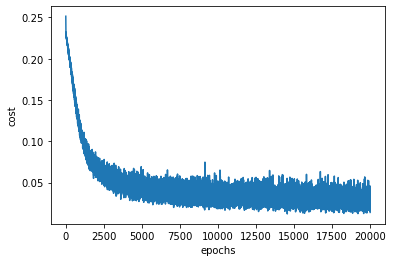

In [23]:
plot_cost()

In [24]:
def plot_accuracy():
    plt.figure()
    plt.plot(np.arange(len(accuracies)), accuracies)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.show()

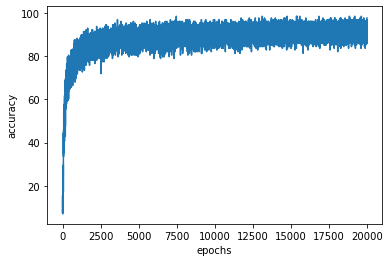

In [25]:
plot_accuracy()

In [27]:
n_costs = costs

In [28]:
cost = 0
avg_costs = []
iterations = []
for i in range(len(n_costs)):
    cost+= n_costs[i]
    if (i+1) % 100 == 0:
        cost /= 100
        avg_costs.append(cost)
        iterations.append((i+1)*10)

In [29]:
def plot_avg_cost():
    plt.figure()
    plt.plot(iterations, avg_costs)
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.show()

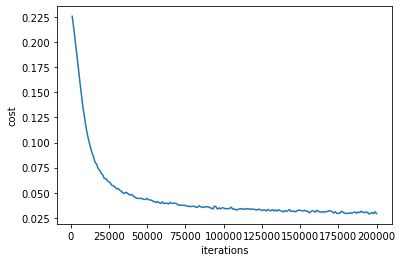

In [30]:
plot_avg_cost()

In [31]:
n_accuracies = accuracies

In [32]:
accuracy = 0
avg_accs = []
iterations = []
for i in range(len(n_accuracies)):
    accuracy+= n_accuracies[i]
    if (i+1) % 100 == 0:
        accuracy /= 100
        avg_accs.append(accuracy)
        iterations.append((i+1)*10)

In [33]:
def plot_avg_accuracy():
    plt.figure()
    plt.plot(iterations, avg_accs)
    plt.xlabel("iterations")
    plt.ylabel("accuracy")
    plt.show()

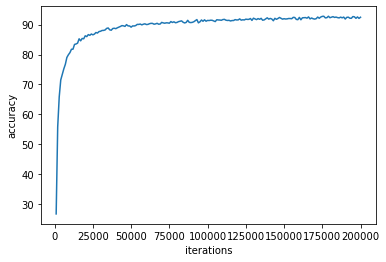

In [34]:
plot_avg_accuracy()